In [9]:
import numpy as np
import random
from numpy import zeros, linspace
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from scipy.stats import binom

## (a)  What is the distribution of the number of kids that Tommy infects on Day 1?

### The distribution of iid bernoulli trials is the binomial distribution.

In [4]:
p = 0.02 #given
n = 20 #given

def perform_bernoulli_trials(n, p):
    """
    Perform n Bernoulli trials with success probability p
    and return number of successes.
    """
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

In [5]:
perform_bernoulli_trials(20,0.02)

0

### we can use scipy to plot the pmf - additional plot for fun

probability mass function is a function that gives the probability that a discrete random variable is exactly equal to some value.

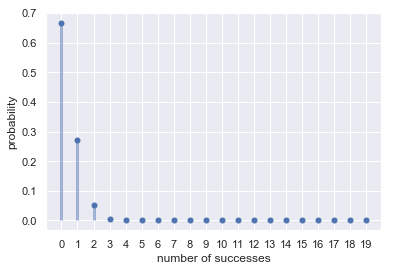

In [6]:
n, p = 20, 0.02
x = [x for x in range(20)]

fig, ax = plt.subplots(1, 1)
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=5, label='binom pmf') 
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=3, alpha=0.5)
plt.xticks(x)
plt.ylabel('probability')
plt.xlabel('number of successes')
plt.show()

## (b)  What is the expected number of kids that Tommy infects on Day 1?

### The expected number of kids is zero

In [25]:
#run 1000 times
res = []
for i in range(0,1000):
    infections = perform_bernoulli_trials(20,0.02)
    res.append(infections)

In [26]:
np.mean(res) # just want to check the mean of the list against the mean of the list for day 2

0.39000000000000001

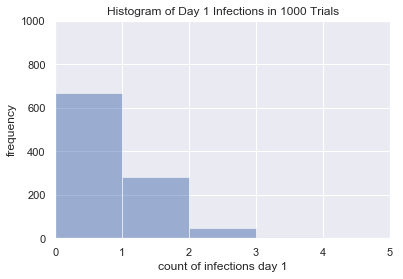

In [27]:
bins = np.arange(0, 10, 1) # fixed bin size

plt.xlim([0, 5])
plt.ylim([0,1000])

plt.hist(res, bins=bins, alpha=0.5)
plt.title('Histogram of Day 1 Infections in 1000 Trials')
plt.xlabel('count of infections day 1')
plt.ylabel('frequency')

plt.show()

## (c)  What  is  the  expected  number  of  kids  that  are  infected  by  Day  2  (you  can count Tommy if you want)?

### STILL ZERO, did not count Tommy

In [28]:
#run 1000 times
#Day 1 and Day 2
#Tommy not counted
res = []
for i in range(0,1000):
    infections = perform_bernoulli_trials(20,0.02)
    healthy = 20 - infections
    infections_day2 = perform_bernoulli_trials(healthy,0.02)
    res.append(infections_day2)

In [29]:
np.mean(res) # just want to check the mean of the list against the mean of the list for day 1

0.379

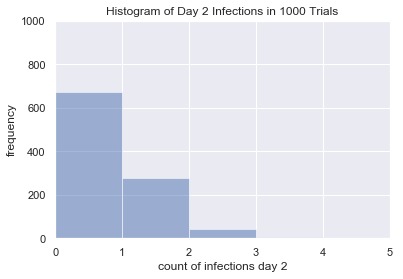

In [31]:
bins = np.arange(0, 10, 1) # fixed bin size

plt.xlim([0, 5])
plt.ylim([0,1000])

plt.hist(res, bins=bins, alpha=0.5)
plt.title('Histogram of Day 2 Infections in 1000 Trials')
plt.xlabel('count of infections day 2')
plt.ylabel('frequency')

plt.show()

## (d)  Simulate the number of kids that are infected on Days 1,2,. . . .  Do this many times.  What are the (estimated) expected numbers of kids that are infected by Day i, i= 1,2,...?  Produce a histogram detailing how long the “epidemic” will last.

### Please scroll down for histogram
### Please scroll down for estimated numbers of infections by day

In [70]:
### TEST CODE WITH PRINT OUTS TO CHECK ###

def simulate_flu():
    N_t=10
    p = 0.02
    S = zeros(N_t+1)
    I = zeros(N_t+1)
    I_day = zeros(N_t+1)
    R = zeros(N_t+1)

    # Initial condition
    S[0] = 20 #how many individuals at time t can get infected, initially 20
    I[0] = 1 #how many individuals at time t are currently infected, initally 1 (aka Tommy)
    R[0] = 0 #how many individuals at time t are removed (recovered and immune?)
    I_day[0] = 1 #only who got infected ON THIS DAY

    # Step equations forward in time
    for n in range(1, N_t+1):
        print('\nDay ', n)
        print('supceptible based on prev day ', S[n-1])
        infected = perform_bernoulli_trials(int(S[n-1]),p)
        print('infected from prev days ', I[n-1])  
        print('infected at this time ', infected)
        I_day[n] = infected
        print('recovered ',R[n-1])
        
        R[n] = R[n-1] + I_day[n-3]  #recovered yesterday + infected 3 days prior                                
        S[n] = S[n-1] - infected #available at start minus infected today
        I[n] = I_day[n] + I_day[n-1] +I_day[n-2]  #total infected = infected today and prev 2 days

        
    return S, I, R

In [71]:
random.seed(42)
S,I,R = simulate_flu()


Day  1
supceptible based on prev day  20.0
infected from prev days  1.0
infected at this time  0
recovered  0.0

Day  2
supceptible based on prev day  20.0
infected from prev days  1.0
infected at this time  1
recovered  0.0

Day  3
supceptible based on prev day  19.0
infected from prev days  2.0
infected at this time  0
recovered  0.0

Day  4
supceptible based on prev day  19.0
infected from prev days  1.0
infected at this time  1
recovered  1.0

Day  5
supceptible based on prev day  18.0
infected from prev days  2.0
infected at this time  0
recovered  1.0

Day  6
supceptible based on prev day  18.0
infected from prev days  1.0
infected at this time  0
recovered  2.0

Day  7
supceptible based on prev day  18.0
infected from prev days  1.0
infected at this time  1
recovered  2.0

Day  8
supceptible based on prev day  17.0
infected from prev days  1.0
infected at this time  0
recovered  3.0

Day  9
supceptible based on prev day  17.0
infected from prev days  1.0
infected at this time  

In [121]:
### CODE WITH PRINT OUTS REMOVED ###

def simulate_flu():
    N_t=200 #200 days was a good value here
    p = 0.02
    S = zeros(N_t+1)
    I = zeros(N_t+1)
    I_day = zeros(N_t+1)
    R = zeros(N_t+1)

    # Initial condition
    S[0] = 20 #how many individuals at time t can get infected, initially 20
    I[0] = 1 #how many individuals at time t are currently infected, initally 1 (aka Tommy)
    R[0] = 0 #how many individuals at time t are removed (recovered and immune?)
    I_day[0] = 1 #only who got infected ON THIS DAY

    # Step equations forward in time
    for n in range(1, N_t+1):
        infected = perform_bernoulli_trials(int(S[n-1]),p)
        I_day[n] = infected
        
        R[n] = R[n-1] + I_day[n-3]  #recovered yesterday + infected 3 days prior                                
        S[n] = S[n-1] - infected #available at start minus infected today
        I[n] = I_day[n] + I_day[n-1] +I_day[n-2]  #total infected = infected today and prev 2 days

        
    return S, I, R

In [130]:
#RUN 1000 times

S = []
I = []
R = []
for i in range(0,1000):
    si, ii, ri = simulate_flu()
    S.append(si)
    I.append(ii)
    R.append(ri)

In [123]:
days = np.arange(0, 201, 1) # just for plotting purposes

Text(0.5, 1.0, 'One simulation of the flu spread')

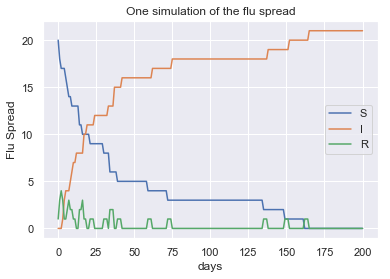

In [124]:
plt.plot(days, S[0], label = 'S')
plt.plot(days, R[0], label = 'I')
plt.plot(days, I[0], label = 'R')
plt.xlabel('days')
plt.ylabel('Flu Spread')
plt.legend()
plt.title('One simulation of the flu spread')

In [125]:
avgS = np.mean(S, axis=0)
avgI = np.mean(I, axis=0)
avgR = np.mean(R, axis=0)

Text(0.5, 1.0, 'Simulation of the flu spread (1000 Trials)')

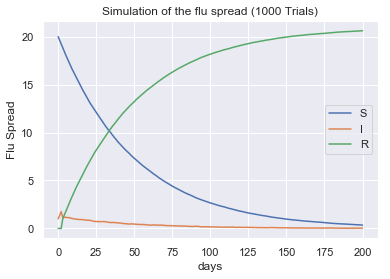

In [126]:
plt.plot(days, avgS, label = 'S')
plt.plot(days, avgI, label = 'I')
plt.plot(days, avgR, label = 'R')
plt.xlabel('days')
plt.ylabel('Flu Spread')
plt.legend()
plt.title('Simulation of the flu spread (1000 Trials)')

In [138]:
#grab the end day of each trial and put it into a list
end = []
for li in R:
    end.append(li.argmax())

### Histogram of when the flu ends

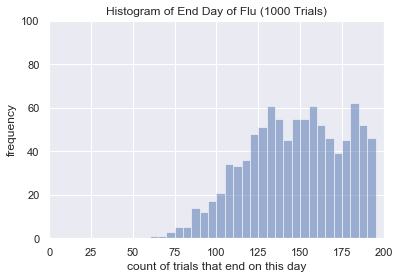

In [146]:
#produce a histogram!
#WHEN DOES IT END?
bins = np.arange(0, 200, 5) # fixed bin size

plt.xlim([0, 200])
plt.ylim([0,100])

plt.hist(end, bins=bins, alpha=0.5)
plt.title('Histogram of End Day of Flu (1000 Trials)')
plt.xlabel('count of trials that end on this day')
plt.ylabel('frequency')

plt.show()

### Table of Infections

In [154]:
import pandas as pd
df = pd.DataFrame([days, avgS, avgI, avgR]).T

In [156]:
df.columns = ['Day', 'Susceptible', 'Infected', 'Recovered']

In [160]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

print(df)

       Day  Susceptible  Infected  Recovered
0      0.0       20.000     1.000      0.000
1      1.0       19.624     1.376      0.000
2      2.0       19.253     1.747      0.000
3      3.0       18.851     1.149      1.000
4      4.0       18.479     1.145      1.376
5      5.0       18.087     1.166      1.747
6      6.0       17.727     1.124      2.149
7      7.0       17.348     1.131      2.521
8      8.0       17.011     1.076      2.913
9      9.0       16.669     1.058      3.273
10    10.0       16.356     0.992      3.652
11    11.0       16.025     0.986      3.989
12    12.0       15.711     0.958      4.331
13    13.0       15.414     0.942      4.644
14    14.0       15.097     0.928      4.975
15    15.0       14.789     0.922      5.289
16    16.0       14.485     0.929      5.586
17    17.0       14.203     0.894      5.903
18    18.0       13.909     0.880      6.211
19    19.0       13.633     0.852      6.515
20    20.0       13.350     0.853      6.797
21    21.0